### Clustering Methods 

1. Hard Clustering Revisited
2. Soft Clustering with Gaussian Mixture Models


Material for this Workshop: 
Python Data Science Handbook
Essential Tools for Working with Data
By Jake VanderPlas
Publisher: O'Reilly Media
Release Date: November 2016


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

The k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like:

1. The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
2. Each point is closer to its own cluster center than to other cluster centers.

#### Generate fake data

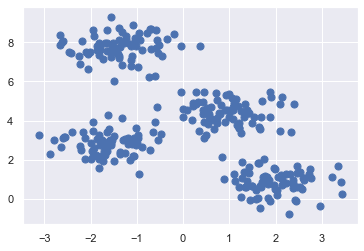

In [5]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [6]:
# Identifying the clusters with k-means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

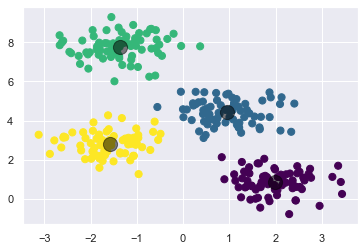

In [7]:
# Plot the clusters and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### Expectation Maximization

Expectation–maximization (E–M) is a powerful algorithm that comes up in a variety of contexts within data science. k-means is a particularly simple and easy-to-understand application of the algorithm, and we will walk through it briefly here. In short, the expectation–maximization approach here consists of the following procedure:

1. Guess some cluster centers
2. Repeat until converged
    1. E-Step: assign points to the nearest cluster center
    2. M-Step: set the cluster centers to the mean

#### A simple implementation of the EM algorithm

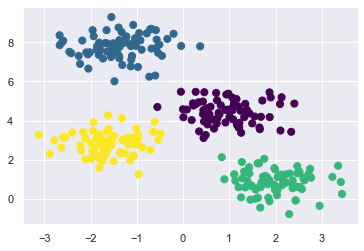

In [9]:
from sklearn.metrics import pairwise_distances_argmin

#### ToDo for the students: 

#Analyze the caveats of expectation–maximization

#1. The globally optimal result may not be achieved
#2. The number of clusters must be selected beforehand
#3. k-means is limited to linear cluster boundaries (recall last workshop how we can create complex data)


def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    # Choose randomly n_clusteres elements from the input list X
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        #print(labels)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');


#### ToDo for the students: 

Analyze the caveats of expectation–maximization

1. The globally optimal result may not be achieved
2. The number of clusters must be selected beforehand
3. k-means is limited to linear cluster boundaries (recall last workshop how we can create complex data)

#### Solutions:

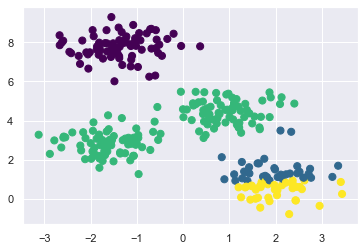

In [10]:
# Task 1
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

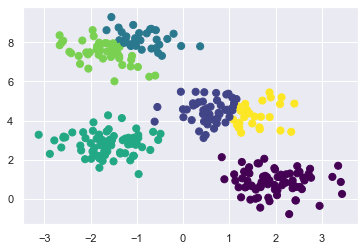

In [22]:
# Task 2 
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

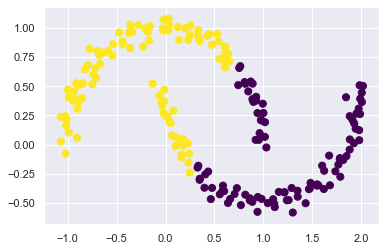

In [11]:
# Task 3
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

labels = KMeans(2, random_state=2).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

### Real World Example of K-means: Image Compression

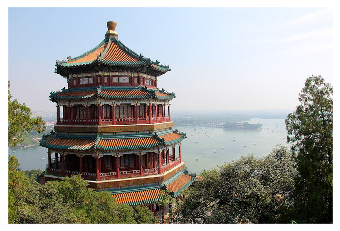

In [12]:
# Load Example Image
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [15]:
# Get (height, width, [red/blue/green]) of image
# RGB is represented as 8 Bit Integers - 0...255 => 255^3 different colors
china.shape

(427, 640, 3)

In [16]:
# Scale it 0...1

In [17]:
data = china / 255.

In [18]:
# Reshape picture to two dimensional vector
data = data.reshape(427 * 640, 3)
data.shape


# Results in a Matrix: rows: Pixel, Columns: R G B

(273280, 3)

In [19]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);


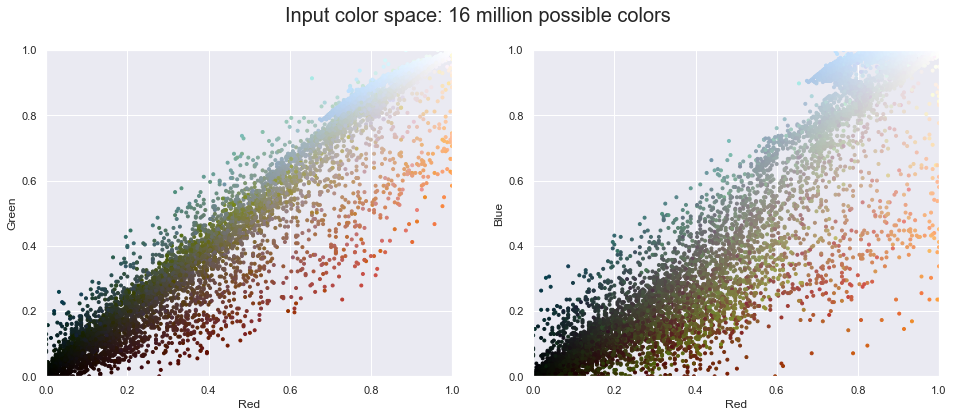

In [20]:
plot_pixels(data, title='Input color space: 16 million possible colors')

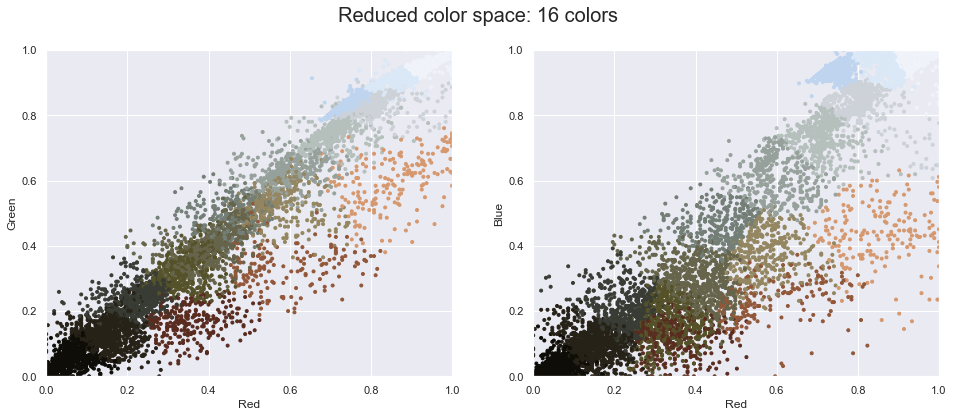

In [29]:
# Reduce these 16 Millions Colors to 16! colors
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16) # Much faster than original K-Means due to large amount of data
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")


### Recoloring the original Image 

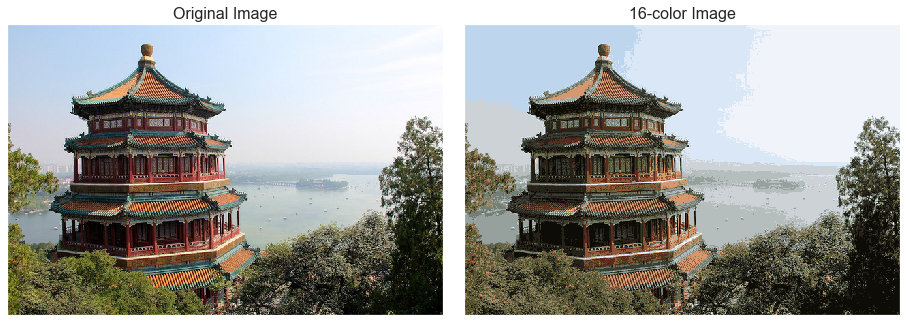

In [30]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

In [31]:
import sys
sys.getsizeof(china_recolored)

128

In [32]:
import sys
sys.getsizeof(china)

819968

# Soft Clustering with Gaussian Mixture Models

The k-means clustering model explored in the previous section is simple and relatively easy to understand, but its simplicity leads to practical challenges in its application. In particular, the non-probabilistic nature of k-means and its use of simple distance-from-cluster-center to assign cluster membership leads to poor performance for many real-world situations. In this section we will take a look at Gaussian mixture models (GMMs), which can be viewed as an extension of the ideas behind k-means, but can also be a powerful tool for estimation beyond simple clustering.

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [34]:
# Generate some data
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

In [35]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

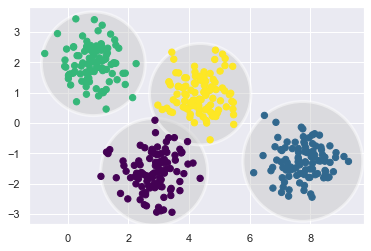

In [36]:
# Plot K-Means Clusters with their cutoff respective functions
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

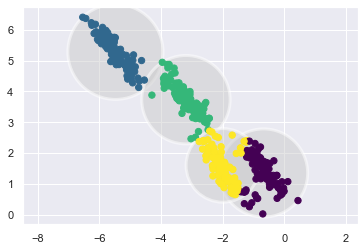

In [37]:
# This entails problems when our data is distributed not in a circular way.
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)

# Nevertheless, k-means is not flexible enough to account for this, 
# and tries to force-fit the data into four circular clusters. 
# This results in a mixing of cluster assignments where the resulting 
# circles overlap: see especially the bottom-right of this plot.

### Gaussian Mixtures help to overcome these issues 

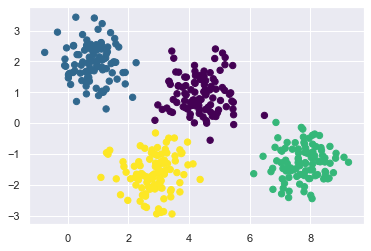

In [38]:
# As always, SKlearn provides us a neat interface to implement GMM 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

#### But because GMM contains a probabilistic model under the hood, it is also possible to find probabilistic cluster assignments

In [39]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.531 0.    0.469 0.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    0.    1.   ]
 [1.    0.    0.    0.   ]
 [0.    0.    0.    1.   ]]


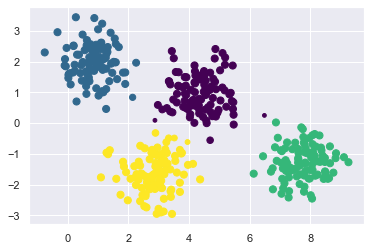

In [40]:
# Representing the certainity of cluster assignments
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);


#### Let's visualize the gaussian functions

In [41]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    # Plot the Gaussian Mixture Model
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

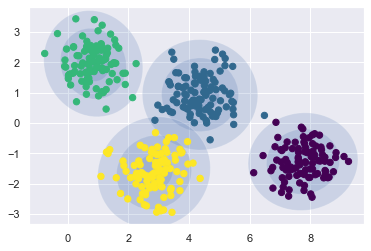

In [42]:
plot_gmm(gmm, X)

In [64]:
### How can we leverage GMM to estimate densities?

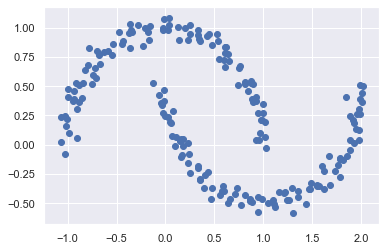

In [43]:
# Moon Shaped Toy Data 
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1]);

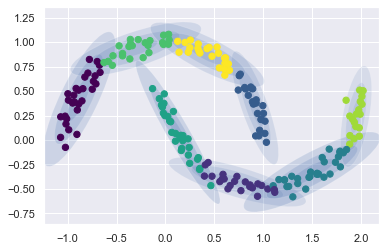

In [46]:
gmm2 = GaussianMixture(n_components=8, covariance_type='full', random_state=0)
plot_gmm(gmm2, Xmoon)

### Task for the students - 10 Min
How can we use GMM to estimate densities? Propose an approach (= 

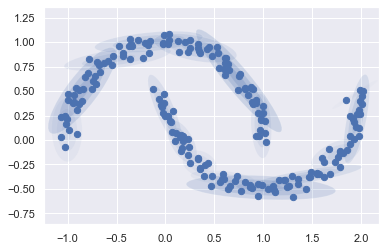

In [74]:
# Solution
gmm16 = GaussianMixture(n_components=16, covariance_type='full', random_state=0)
plot_gmm(gmm16, Xmoon, label=False)

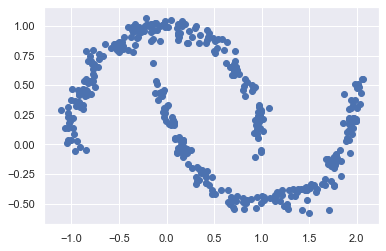

In [84]:
# Generate "new" data based on our newly learnt GMM density
Xnew = gmm16.sample(400)
plt.scatter(Xnew[0][:, 0], Xnew[0][:, 1])

## Example: Generating "new" data from learnt distributions

In [47]:
from sklearn.datasets import load_digits
# Load Digit data
digits = load_digits()
digits.data.shape

(1797, 64)

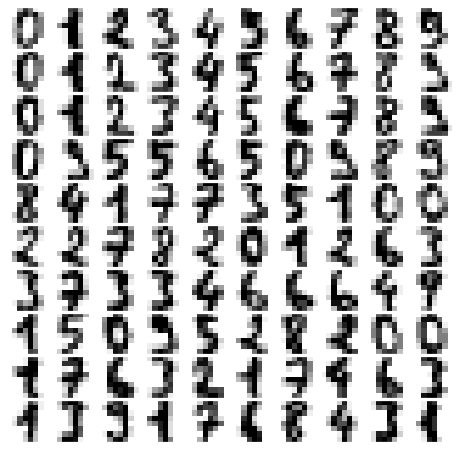

In [48]:
# plot digits
def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)
plot_digits(digits.data)

In [49]:
# GMM suffer from the curse of dimensionality, so we reduce it with PCA
from sklearn.decomposition import PCA
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)
data.shape

(1797, 41)

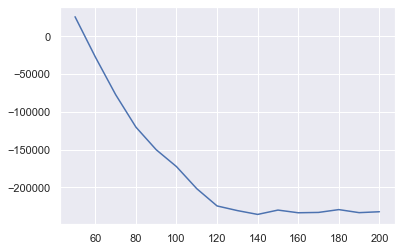

In [50]:
# Determine the optimal number of clusters (NOTE: this only works for Density Estimation)
n_components = np.arange(50, 210, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0)
          for n in n_components]
aics = [model.fit(data).aic(data) for model in models]
plt.plot(n_components, aics);


In [51]:
# It appears that 140 is the optimal number of gaussian
gmm = GaussianMixture(140, covariance_type='full', random_state=0)
gmm.fit(data)
print(gmm.converged_)

True


In [52]:
# Sample data from the "learnt" function
data_new = gmm.sample(100)
data_new[0].shape

(100, 41)

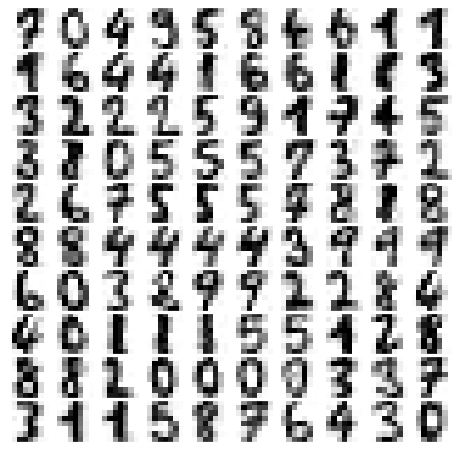

In [53]:
# Transform back to original space
digits_new = pca.inverse_transform(data_new[0])
plot_digits(digits_new)


### This is completly new data, sampled from our GaussianMixture Density